<a href="https://colab.research.google.com/github/ChihabEddine98/DL_course/blob/main/lec1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.optimizers import RMSprop

In [10]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [11]:
# download dataset
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

In [12]:
# Data prepor 
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]**2)
train_images = train_images/255.0
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]**2)
test_images = test_images/255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [16]:
# Model Settings
print(train_images.shape[1])
model = Sequential(Dense(512,input_shape = (train_images.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Optimezer Settings 
rms = RMSprop(lr=0.1)
model.compile(loss = 'categorical_crossentropy', optimizer=rms,metrics=['accuracy'] )

def train(model):
  with tf.device('/device:GPU:0'):
      history = model.fit(train_images,train_labels, 
                          verbose = 1,
                          batch_size = 128,
                          epochs = 5
                          )
      return history

784


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
train(model)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 9.5125 - accuracy: 0.8335
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7816 - accuracy: 0.8903
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7276 - accuracy: 0.9014
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6978 - accuracy: 0.9065
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7189 - accuracy: 0.9108


[[0.0000000e+00 0.0000000e+00 3.0544104e-19 1.7958542e-28 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


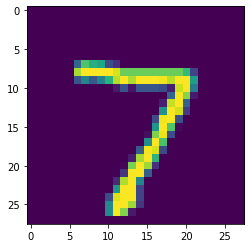

In [20]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
img = test_images [0].reshape ((1, 28*28))
print (model.predict(img))